# 第三章 K 近邻法

- k 近邻法 **k-nearest nrighbor, k-NN** 是一中基于分类与回归方法

- K 近邻法实际上利用训练数据集对特征向量空间进行划分，并作为其分类的模型，不具有显式的学习过程

- k 近邻法基本三要素：k 值的选择、距离的度量、分类决策规则

- k 近邻法的实现方法 —— **kd 树** ： 构造 kd 树 和搜索 kd 树 的算法

- $k$ 值小时，$k$ 近邻模型更复杂；$k$ 值大时，$k$ 近邻模型更简单。$k$ 值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的 $k$

- 常用的分类决策规则 **majority voting rule** 是多数表决，对应于经验风险最小化

- 特征空间中两个实例点的距离度量是两个实例点相似程度的反映

设特征空间$x$是$n$维实数向量空间 ，$x_{i}, x_{j} \in \mathcal{X}$,$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}$,$x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \cdots, x_{j}^{(n)}\right)^{\mathrm{T}}$
，则：$x_i$,$x_j$的$L_p$距离定义为:


$L_{p}\left(x_{i}, x_{j}\right)=\left(\sum \limits_{i=1}^{n}\left|x_{i}^{(i)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}$

- $p= 1$  曼哈顿距离
- $p= 2$  欧氏距离
- $p= \infty$   切比雪夫距离

- $k$ 近邻法的实现需要考虑如何快速搜索 k 个最近邻点；**kd** 树是一种便于对 k 维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对 $k$ 维空间的一个划分，其每个结点对应于 $k$ 维空间划分中的一个超矩形区域。利用 **kd** 树可以省去对大部分数据点的搜索， 从而减少搜索的计算量

In [1]:
import math

# define function of distance with default p = 2
def L(x, y, p = 2):
  if (len(x) == len(y)) and (len(x) > 1):
      sum = 0
      for i in range(len(x)):
          sum += math.pow(abs(x[i] - y[i]), p)
      return math.pow(sum, 1/p)
  else:
      return 0
    
# test
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

# compute distance with p = (1, 2, 3, 4) of x1 to x2(x3) 
for i in range(1, 5):
  # r is dictionary type, no same element.
  r = {'1-{}'.format(c): L(x1, c, p=i) for c in [x2, x3]}
  # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表对象 list(zip(iterator_object))
  print("p = {}, minest distance = {}".format(i, min(zip(r.values(), r.keys()))))

p = 1, minest distance = (4.0, '1-[5, 1]')
p = 2, minest distance = (4.0, '1-[5, 1]')
p = 3, minest distance = (3.7797631496846193, '1-[4, 4]')
p = 4, minest distance = (3.5676213450081633, '1-[4, 4]')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# 这个模块实现了特定目标的容器，以提供 Python 标准内建容器 dict、list、set、tuple 的替代选择。
# Counter：字典的子类，提供了可哈希对象的计数功能
# defaultdict：字典的子类，提供了一个工厂函数，为字典查询提供了默认值
# OrderedDict：字典的子类，保留了他们被添加的顺序
# namedtuple：创建命名元组子类的工厂函数
# deque：类似列表容器，实现了在两端快速添加(append)和弹出(pop)
# ChainMap：类似字典的容器类，将多个映射集合到一个视图里面
from collections import Counter

# load data and processing
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<function matplotlib.pyplot.show(close=None, block=None)>

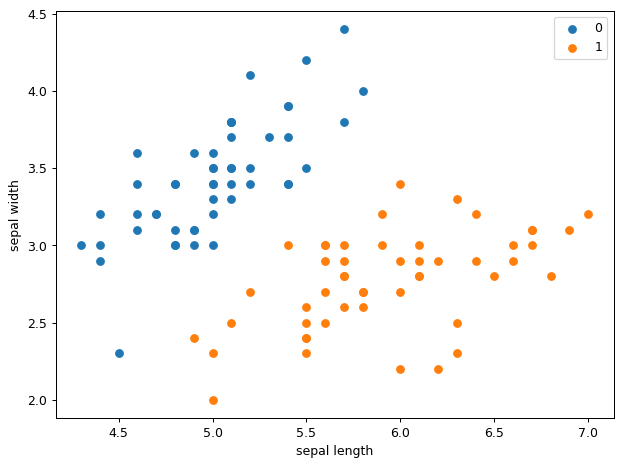

In [3]:
fig = plt.figure(figsize = (8,6), dpi = 90)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend() # 图例
plt.show

In [4]:
# the processing of data for model
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape = {}, y_train shape = {}".format(np.shape(X_train), np.shape(y_train)))
print("X_test shape = {}, y_test shape = {}".format(np.shape(X_test), np.shape(y_test)))


X_train shape = (80, 2), y_train shape = (80,)
X_test shape = (20, 2), y_test shape = (20,)


0.95
Test New Point: 1.0
Test New Point: 0.0


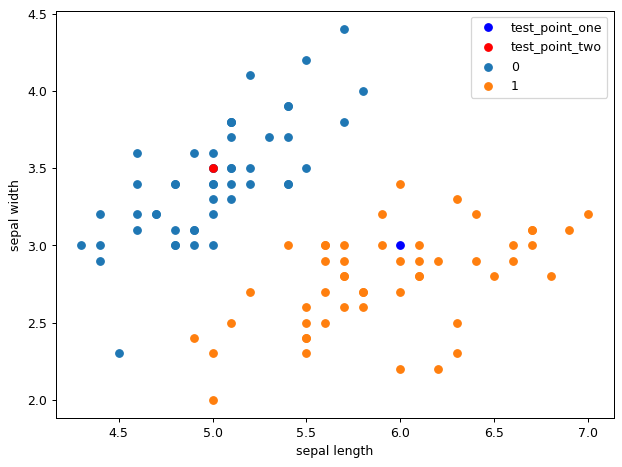

In [5]:
# the class of knn
class KNN:
  # the default n = 3, the default p = 2
  def __init__(self, X_train, y_train, n_neighbors=3, p=2):
      """
      parameter: n_neighbors 临近点个数
      parameter: p 距离度量
      """
      self.n = n_neighbors
      self.p = p
      self.X_train = X_train
      self.y_train = y_train

  def predict(self, X):
      # 随机取出 n 个点
      knn_list = []
      for i in range(self.n):
          # compute norm of Matrix or Vector.
          distance = np.linalg.norm(X - self.X_train[i], ord=self.p)
          # the value of list is tuple with label.
          knn_list.append((distance, self.y_train[i]))

      # trainning with computing the Euclidean distance to compare in train set.
      for i in range(self.n, len(self.X_train)):
          # list.index(obj) 从列表中找出某个值第一个匹配项的索引位置
          # max(list, predicate for lambda expression) 谓词
          # key=lambda x: x[0] 表示按 tuple 里 distance 作为比较对象
          max_diatance_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
          distance = np.linalg.norm(X - self.X_train[i], ord=self.p)
          if knn_list[max_diatance_index][0] > distance:
              # compare the distance for search least distance.
              knn_list[max_diatance_index] = (distance, self.y_train[i])

      # 统计 label
      knn = [k[-1] for k in knn_list]
      # collections module for Counter() Provides the counting function of hashable objects
      count_pairs = Counter(knn)
      # lambda x: x[1] --> label
      max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
      # return label
      return max_count

  # test for KNN with fixed n and p.
  def accuracy(self, X_test, y_test):
      num_correct = 0
      for X, y in zip(X_test, y_test):
          label = self.predict(X)
          if label == y:
              num_correct += 1
      return num_correct / len(X_test)
    
# TEST KNN
knn = KNN(X_train, y_train)
print(knn.accuracy(X_test, y_test))
# new point
test_point_one= [6.0, 3.0]
test_point_two = [5.0, 3.5]
print('Test New Point: {}'.format(knn.predict(test_point_one)))
print('Test New Point: {}'.format(knn.predict(test_point_two)))

# the Visualization of KNN result.
fig = plt.figure(figsize = (8,6), dpi = 90)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point_one[0], test_point_one[1], 'bo', label='test_point_one')
plt.plot(test_point_two[0], test_point_two[1], 'ro', label='test_point_two')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
# sklearn module archive KNN clsaaifier
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

1.0

In [18]:
# kd-tree 结点构造数据结构 类似二叉树
class KdNode(object):
  def __init__(self, dim_element, split, left, right):
      self.dim_element = dim_element  # k 维向量节点 ( k维空间中的一个样本点 )
      self.split = split  # 整数（ 进行分割维度的序号 ）
      self.left = left  # 该结点分割超平面左子空间构成的 kd-tree
      self.right = right  # 该结点分割超平面右子空间构成的 kd-tree

# the class of kd-tree
class KdTree(object):
  def __init__(self, data):
      k = len(data[0])  # 数据维度

      def CreateNode(split, data_set):  # 按第 split 维划分数据集 data_set 创建 KdNode
          if not data_set:  # 数据集为空
              return None
          # key 参数的值 是 一元谓词 (参考 CPlusPlus 里面的概念)
          data_set.sort(key=lambda x: x[split])
          split_position = len(data_set) // 2
          median = data_set[split_position]  # 中位数分割点
          split_next = (split + 1) % k  # cycle coordinates

          # creating kd-tree with Recursion
          return KdNode(median, split,
                CreateNode(split_next, data_set[:split_position]),      # 创建左子树
                CreateNode(split_next, data_set[split_position + 1:]))  # 创建右子树

      self.root = CreateNode(0, data)  # 从第 0 维分量开始构建 kd-tree, return root nodes


# the Preorder traversal of kd-tree.
def preorderTraversal(root):
    print(root.dim_element)
    if root.left:  # 节点不为空
        preorderTraversal(root.left)
    if root.right:
        preorderTraversal(root.right)
        
# -----------------------------------------------------
# 对构建好的 kd-tree 进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个 namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple", "nearest_point  nearest_distance  nodes_visited")

# k 近邻法
def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_distance):
        if kd_node is None:
            return result([0] * k, float("inf"), 0)  # python中用 float("inf") 和 float("-inf") 表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dim_element  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第 s 维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_distance)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        distance = temp1.nearest_distance  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if distance < max_distance:
            max_distance = distance  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_distance = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_distance < temp_distance:  # 判断超球体是否与超平面相交
            return result(nearest, distance, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_distance = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_distance < distance:  # 如果“更近”
            nearest = pivot  # 更新最近点
            distance = temp_distance  # 更新最近距离
            max_distance = distance  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_distance)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_distance < distance:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            distance = temp2.nearest_distance  # 更新最近距离

        return result(nearest, distance, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归
  
# -----------------------------------------------------------
# TEST
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd_tree = KdTree(data)
print(preorderTraversal(kd_tree.root))
ret = find_nearest(kd_tree, [3,4.5])
print(ret)

# -----------------------------------------
from time import time
from random import random

# 产生一个 k 维随机向量，每维分量值在 0~1
def random_point(k):
    return [random() for _ in range(k)]

# 产生 n 个 k 维随机向量 
def random_points(k, n):
    return [random_point(k) for _ in range(n)] 

N = 400000
t0 = time()
kd_tree2 = KdTree(random_points(3, N))        # 构建包含四十万个 3 维空间样本点的 kd-tree
ret2 = find_nearest(kd_tree2, [0.1,0.5,0.8])  # 四十万个样本点中寻找离目标最近的点
t1 = time()
print("time: ",t1-t0, "s")
print(ret2)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]
None
Result_tuple(nearest_point=[2, 3], nearest_distance=1.8027756377319946, nodes_visited=4)
time:  2.9751381874084473 s
Result_tuple(nearest_point=[0.09431780839981674, 0.49772167630640807, 0.8009925181488606], nearest_distance=0.006201866856825718, nodes_visited=56)


## 习题 3.1

参照图3.1，在二维空间中给出实例点，画出 $k$ 为 1 和 2 时的 $k$ 近邻法构成的空间划分，

并对其进行比较，体会 **$k$ 值选择与模型复杂度及预测准确率**的关系。


The shape of data: (18, 3)
---------------------------


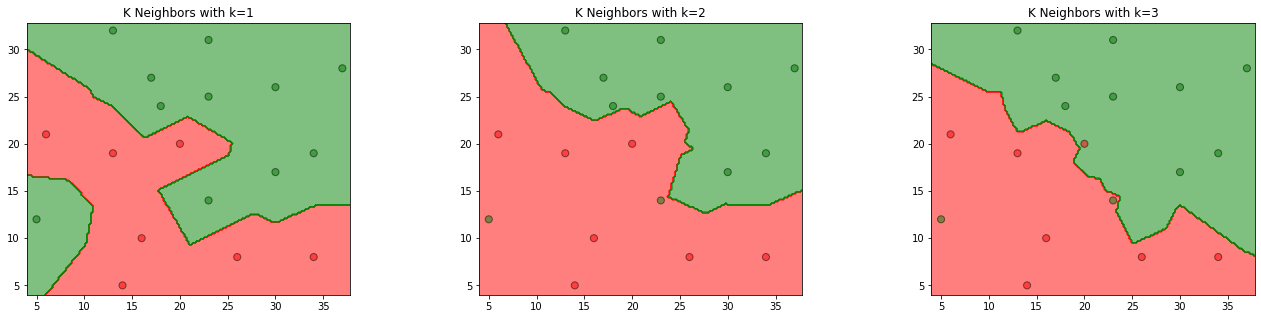

In [29]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# 模拟二维空间中数据点 (X, Y, Label) | [18, 3]
data = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0], [16, 10, 0], [13, 19, 0], [13, 32, 1],
                 [17, 27, 1], [18, 24, 1], [20, 20, 0], [23, 14, 1], [23, 25, 1], [23, 31, 1],
                 [26, 8, 0], [30, 17, 1], [30, 26, 1], [34, 8, 0], [34, 19, 1], [37, 28, 1]])
print("The shape of data: {}".format(np.shape(data)))
print("---------------------------")
X_train = data[:, 0:2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=2, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=3, n_jobs=-1))
models = (clf.fit(X_train, y_train) for clf in models)


# the Visualization
titles = ('K Neighbors with k=1', 'K Neighbors with k=2', 'K Neighbors with k=3')
fig = plt.figure(figsize=(22, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 3).flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()

## 习题 3.2

利用例题3.2 构造的 $kd$ 树求点 $x=(3,4.5)^T$ 的最近邻点。



In [30]:
import numpy as np
from sklearn.neighbors import KDTree

train_data = np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
tree = KDTree(train_data, leaf_size=2)
dist, ind = tree.query(np.array([(3, 4.5)]), k=1)
x1 = train_data[ind[0]][0][0]
x2 = train_data[ind[0]][0][1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)


## 习题3.3

参照算法3.3，写出输出为 $x$ 的 $k$ 近邻的算法。


**Solution：**

**算法：用 kd 树的 $k$ 近邻搜索**  

**Input**：已构造的kd树；目标点$x$；

**Output**：$x$的最近邻    

1. 在$kd$树中找出包含目标点$x$的叶结点：从根结点出发，递归地向下访问树。若目标点$x$当前维的坐标小于切分点的坐标，则移动到左子结点，否则移动到右子结点，直到子结点为叶结点为止；  
2. 如果“当前$k$近邻点集”元素数量小于$k$或者叶节点距离小于“当前$k$近邻点集”中最远点距离，那么将叶节点插入“当前k近邻点集”；  
3. 递归地向上回退，在每个结点进行以下操作：  
(a)如果“当前$k$近邻点集”元素数量小于$k$或者当前节点距离小于“当前$k$近邻点集”中最远点距离，那么将该节点插入“当前$k$近邻点集”。  
(b)检查另一子结点对应的区域是否与以目标点为球心、以目标点与于“当前$k$近邻点集”中最远点间的距离为半径的超球体相交。如果相交，可能在另一个子结点对应的区域内存在距目标点更近的点，移动到另一个子结点，接着，递归地进行最近邻搜索；如果不相交，向上回退；
4. 当回退到根结点时，搜索结束，最后的“当前$k$近邻点集”即为$x$的最近邻点。

In [32]:
# 构建 kd 树，搜索待预测点所属区域
from collections import namedtuple
import numpy as np

# 建立节点类
class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return str(tuple(self))

# class of kd tree
class KdTree():
    def __init__(self, k=1):
        self.k = k
        self.kdtree = None

    # 构建 kd tree
    def _fit(self, X, depth=0):
        try:
            k = self.k
        except IndexError as e:
            return None
        # 这里可以展开，通过方差选择 axis
        axis = depth % k
        X = X[X[:, axis].argsort()]
        median = X.shape[0] // 2
        try:
            X[median]
        except IndexError:
            return None
        return Node(location=X[median], left_child=self._fit(X[:median], depth + 1),
                    right_child=self._fit(X[median + 1:], depth + 1))

    def _search(self, point, tree=None, depth=0, best=None):
        if tree is None:
            return best
        k = self.k
        # 更新 branch
        if point[0][depth % k] < tree.location[depth % k]:
            next_branch = tree.left_child
        else:
            next_branch = tree.right_child
        if not next_branch is None:
            best = next_branch.location
        return self._search(point, tree=next_branch, depth=depth + 1, best=best)

    def fit(self, X):
        self.kdtree = self._fit(X)
        return self.kdtree

    def predict(self, X):
        res = self._search(X, self.kdtree)
        return res

# --------------------------------------------
# TEST
KNN = KdTree()
X_train = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
KNN.fit(X_train)
X_new = np.array([[3, 4.5]])
res = KNN.predict(X_new)

x1 = res[0]
x2 = res[1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)
